In [1]:
import numpy as np
import sympy as sy
import scipy as sp
import matplotlib.pylab as plt
from IPython.display import clear_output
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import warnings
warnings.filterwarnings('ignore')  
plt.rcParams['text.usetex'] = True

In [2]:
def RK4(f, t_span, const, dt, x0):
    t = np.arange(t_span[0], t_span[1], dt)
    x_n = np.zeros((len(t), len(x0)), dtype=float)
    x_n[0] = x0
    
    for i in range(len(t)-1):
        k1 = dt * np.array(f(t[i], x_n[i], const))
        k2 = dt * np.array(f(t[i] + 0.5*dt, x_n[i] + 0.5*k1, const))
        k3 = dt * np.array(f(t[i] + 0.5*dt, x_n[i] + 0.5*k2, const))
        k4 = dt * np.array(f(t[i] + dt, x_n[i] + k3, const))
        x_n[i + 1] = x_n[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, x_n

**6.5.19** <span style="color:red">(Rabbits vs. foxes)                                                                                                                             
The model $\dot{R} = aR−bRF, \  \dot{F} =−cF +dRF$ is the **Lotka-Volterra predator-prey model**.                                                                
Here $R(t)$ is the number of rabbits, $F(t)$ is the number of foxes, and $a, b, c, d > 0$ are parameters.                                                      
a) Discuss the biological meaning of each of the terms in the model. Comment on any unrealistic assumptions.                                                
b) Show that the model can be recast in dimensionless form as $\dot{x} = x(1−y), \ \dot{y}=\mu y(x-1)$.                                                        
c) Find a conserved quantity in terms of the dimensionless variables.                                                                                         
d) Show that the model predicts cycles in the populations of both species, for almost all initial conditions.                                                    
This model is popular with many textbook writers because it’s simple, but some are beguiled into taking it too seriously.                                        
Mathematical biologists dismiss the **Lotka-Volterra model** because it is not structurally stable,                                                       
and because real **predator-prey cycles** typically have a characteristic amplitude.                                                                                                                                   
In other words, realistic models should predict a single closed orbit, or perhaps finitely many, but not a continuous family of neutrally stable cycles.                                                                                                                                                       
See the discussions in **May (1972), Edelstein-Keshet (1988), or Murray (2002)**.



## System

$\qquad\displaystyle\dot R = aR - bRF,\qquad \dot F = -cF + dRF,
\qquad a,b,c,d>0,\; R\ge0,\;F\ge0.$

### (a) Biological meaning and unrealistic assumptions

* $aR$: exponential growth of rabbits in absence of predators, with per-capita birth rate $a$.
* $-bRF$: removal of rabbits by predation; mass-action term with per-capita predation rate proportional to predator abundance $F$ and prey $R$.
* $-cF$: exponential death (or emigration) of foxes in absence of food, per-capita death rate $c$.
* $+dRF$: growth of foxes due to consumption of rabbits; mass-action conversion with efficiency $d$.

**Unrealistic assumptions / limitations**

* No density dependence for rabbits except via predation (no carrying capacity).
* Linear functional response (mass-action) for predation — ignores predator satiation (no Holling-type saturation).
* Predator growth is proportional to prey consumed (no explicit energy budget, age structure, etc.).
* No stochasticity, spatial structure, or other ecological realism.
* Dynamics are neutrally stable (see part d): amplitudes of cycles depend on initial conditions,                                                            
  unlike typical observed predator–prey cycles which have a characteristic amplitude.

### (b) Nondimensionalization

We rescale variables using the positive coexistence equilibrium of the system.

1. Equilibrium (set $\dot R=\dot F=0$ with $R,F>0$) gives

$\qquad\displaystyle a-bF=0\ \Rightarrow\ F^*=\frac{a}{b},\qquad -c+dR=0\ \Rightarrow\ R^*=\frac{c}{d}.$

2. Define dimensionless variables and time:

$\qquad\displaystyle x=\frac{R}{R^*}=\frac{dR}{c},\qquad y=\frac{F}{F^*}=\frac{bF}{a},\qquad \tau = a t.$

(We choose $\tau=a t$ so the time scale is rabbit births.)

3. Compute derivatives with respect to $\tau$. Since $\frac{d}{d\tau}=(\frac{1}{a})\frac{d}{dt}$,

$\qquad\displaystyle\frac{dx}{d\tau}=\frac{1}{R^*}\frac{dR}{d\tau}=\frac{1}{R^*}\frac{1}{a}\dot R
=\frac{1}{R^*}\frac{1}{a}\big(aR-bRF\big)=\frac{1}{R^*}\big(R-\frac{b}{a}RF\big).$

But $R/R^*=x$ and $\frac{b}{a}F = F/F^* = y$. So

$\qquad\displaystyle \frac{dx}{d\tau}=x(1-y).$

For $y$:

$\qquad\displaystyle\frac{dy}{d\tau}=\frac{1}{F^*}\frac{dF}{d\tau}
=\frac{1}{F^*}\frac{1}{a}\dot F =\frac{1}{aF^*}\big(-cF+dRF\big)=\frac{c}{a}\Big(-\frac{F}{F^*}+\frac{dR}{c}\frac{F}{F^*}\Big).$

Using $y=F/F^*$ and $x=dR/c$, we get

$\qquad\displaystyle \frac{dy}{d\tau}=\frac{c}{a}\,y(x-1).$

Set $\displaystyle \mu=\frac{c}{a}>0$. Thus the nondimensional system is

$\qquad\displaystyle\boxed{\; \dot x = x(1-y),\qquad \dot y = \mu\, y(x-1)\; } \quad(\dot{}\equiv d/d\tau).$

### (c) Conserved quantity

We look for a function $H(x,y)$ such that

$\qquad\displaystyle\frac{dH}{d\tau} = \frac{\partial H}{\partial x} \dot{x} + \frac{\partial H}{\partial y} \dot{y} = 0.$

This is the “conserved quantity” or Hamiltonian for the system.

Assume $H(x,y) = f(x) + g(y)$. Then

$\qquad\displaystyle\frac{dH}{d\tau} = f'(x) \dot{x} + g'(y) \dot{y}.$

We want this to vanish **along trajectories**.

$\qquad\displaystyle f'(x) \cdot x(1-y) + g'(y) \cdot \mu y(x-1) = 0.$

Factor terms,

$\qquad\displaystyle f'(x) x (1-y) + \mu g'(y) y (x-1) = 0.$

We want this to hold for all $x>0, y>0$.

Notice this is possible if we write

$\qquad\displaystyle\frac{f'(x) x}{x-1} = \mu \frac{g'(y) y}{1-y}.$

Since LHS depends only on $x$ and RHS depends only on $y$, both must be **equal to a constant**. Choose constant = 1. Then

$\qquad\displaystyle f'(x) = \frac{x-1}{x} = 1 - \frac{1}{x}, \quad g'(y) = \frac{1-y}{\mu y} = \frac{1}{\mu}\left(1 - \frac{1}{y}\right).$

Now Integrate

$\qquad\displaystyle f(x) = \int \left(1 - \frac{1}{x}\right) dx = x - \ln x + C_1,$

$\qquad\displaystyle g(y) = \int \frac{1}{\mu} \left(1 - \frac{1}{y}\right) dy = \frac{1}{\mu} (y - \ln y) + C_2$

Multiply through by $\mu$ to simplify constants 

$\qquad\displaystyle H(x,y) = \mu f(x) + \mu g(y) = \mu(x - \ln x) + (y - \ln y) + \text{constant}.$

Compute

$\qquad\displaystyle \frac{d}{d\tau}\big[\,\mu(x-\ln x)+ (y-\ln y)\,\big]
=\mu\Big(1-\frac{1}{x}\Big)\dot x +\Big(1-\frac{1}{y}\Big)\dot y.$

Substitute $\dot x=x(1-y)$ and $\dot y=\mu y(x-1)$:

$\qquad\displaystyle\begin{aligned}
\frac{dH}{d\tau} &=\mu\Big(1-\frac{1}{x}\Big)x(1-y) + \Big(1-\frac{1}{y}\Big)\mu y(x-1)\\
&=\mu(x-1)(1-y)+\mu(y-1)(x-1) \\ &=\mu(x-1)\left[(1-y)+(y-1)\right] =0. \end{aligned}$

Hence $H$ is conserved. So one conserved quantity is

$\qquad\displaystyle\boxed{ \; H(x,y)=\mu(x-\ln x) + \big(y-\ln y\big) \; = \text{constant along solutions.} \;}$


### (d) Cycles for almost all positive initial conditions

1. The coexistence equilibrium in nondimensional variables is $(x,y)=(1,1)$. At this point $H(1,1)=\mu(1-0)+ (1-0)=\mu+1$.

2. Level sets $\{(x,y): H(x,y)=C\}$ are invariant under the flow because $H$ is conserved.

3. For any initial $(x_0,y_0)$ with $x_0>0,y_0>0$, the level set through $(x_0,y_0)$ is a closed curve that encloses $(1,1)$. Reason:

   * As $x\to0^+$ or $y\to0^+$, $H\to +\infty$ because $-\ln x$ or $-\ln y$ blow up.
   * As $x\to\infty$ or $y\to\infty$, $H\to +\infty$ due to linear terms.
   * Thus for fixed finite $C> \min H$, the level set is bounded and does not touch the axes; continuity gives a smooth closed curve.
   * The equilibrium $(1,1)$ is a critical point of $H$ (minimum), so level sets for $C>H(1,1)$ are closed curves around it.

4. Since trajectories cannot cross level sets and each trajectory lies on its level set, and those level sets are closed bounded curves,                      
   the trajectory through a point is periodic (except if the point is at an equilibrium). Thus **for almost all** initial positive conditions                 
   (i.e. all except the two boundary equilibria and the fixed point itself) the solution is a closed periodic orbit.

6. The system therefore predicts a continuous one-parameter family of neutrally stable cycles (one cycle for each value of $H$), centered on $(1,1)$.      
   This is the hallmark of the classical Lotka–Volterra neutral cycles :                                                                                    
    amplitude depends on initial condition, not on parameters — in particular there is no attracting limit cycle.


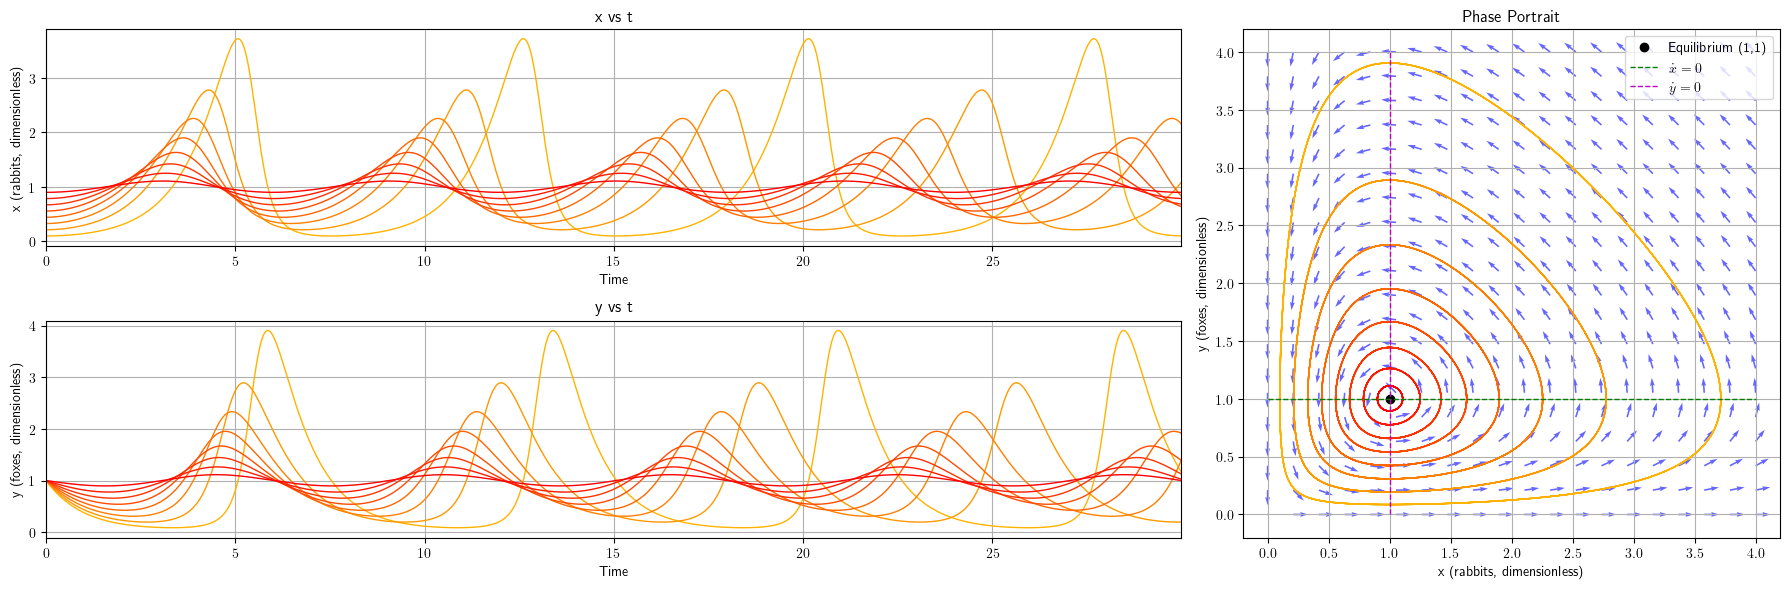

In [6]:
def LV_dimless(t, state, mu):
    x, y = state
    dxdt = x * (1 - y)
    dydt = -mu * y * (1 - x)
    return [dxdt, dydt]

mu  = 1.1
ICs = np.linspace(0.1, 0.9, 8)
colors = plt.cm.autumn_r(np.linspace(0.3, 1.0, len(ICs)))  

x = np.linspace(0, 4, 20)
y = np.linspace(0, 4, 20)
X, Y = np.meshgrid(x, y)
U =  X * (1 - Y)
V = -Y * (1 - X)
N = np.sqrt(U**2 + V**2) + 1e-8  # normalize vectors

fig = plt.figure(figsize=(18,6))
gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, 0:2])  # x vs t
ax2 = fig.add_subplot(gs[1, 0:2])  # y vs t
ax3 = fig.add_subplot(gs[:, 2])    # phase portrait

ax3.quiver(X, Y, U/N, V/N, color='blue', alpha=0.6)

for i, x0 in enumerate(ICs):
    t, sol = RK4(LV_dimless, [0, 30], mu, 0.01, [x0, 1])
    ax1.plot(t, sol[:,0], color=colors[i], lw=1, label=f"x0={x0:.2f}" if i==0 else "")
    ax2.plot(t, sol[:,1], color=colors[i], lw=1)
    ax3.plot(sol[:,0], sol[:,1], color=colors[i], lw=1)

ax3.plot(1, 1, 'ko', label='Equilibrium (1,1)')       # Equilibrium point

x_nc = np.linspace(0, 4, 200)
ax3.plot(x_nc, np.ones_like(x_nc), 'g--', lw=1, label=r'$\dot{x}=0$') # Nullclines
ax3.plot(np.ones_like(x_nc), x_nc, 'm--', lw=1, label=r'$\dot{y}=0$') # Nullclines

ax1.set_xlabel('Time')
ax1.set_ylabel('x (rabbits, dimensionless)')
ax1.set_title('x vs t')
ax1.set_xlim(0, t.max())
ax2.set_xlabel('Time')
ax2.set_ylabel('y (foxes, dimensionless)')
ax2.set_title('y vs t')
ax2.set_xlim(0, t.max())
ax3.set_xlabel('x (rabbits, dimensionless)')
ax3.set_ylabel('y (foxes, dimensionless)')
ax3.set_title('Phase Portrait')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax3.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

**7.2.18**                                                                                                                                                        
<span style="color:red">Consider the predator-prey model                                                                                                      
$\qquad\displaystyle \dot{x}=rx\left(1-\frac{x}{2}\right)-\frac{2x}{1+x}y, \ \dot{y}=-y+\frac{2x}{1+x}y $                                                      
where $r>0$ and $x, y\ge 0$.                                                                                                                                
Prove this system has no closed orbits by invoking Dulac’s criterion with the function $\displaystyle g(x,y)=\frac{1+x}{x}y^{\alpha-1}$ for a suitable choice of $\alpha$                                                                                                                                            
(**Hofbauer and Sigmund 1998**).


System 

$\qquad\displaystyle
\dot x=f(x,y)=r x\Big(1-\frac{x}{2}\Big)-\frac{2x}{1+x}\,y,\qquad
\dot y=h(x,y)=y\Big(-1+\frac{2x}{1+x}\Big),
\qquad r>0.$

**Dulac multiplier**

$\qquad\displaystyle g(x,y)=\frac{1+x}{x}\,y^{\alpha-1},\qquad \alpha>0.$

Compute $g f$ :

$\qquad\displaystyle\begin{aligned}
g f
&=\frac{1+x}{x}\,y^{\alpha-1}\Big[r x\Big(1-\frac{x}{2}\Big)-\frac{2x}{1+x}y\Big]\\[4pt]
&=y^{\alpha-1}\Big[\frac{1+x}{x}\,r x\Big(1-\frac{x}{2}\Big)-\frac{1+x}{x}\frac{2x}{1+x}y\Big]\\[4pt]
&=y^{\alpha-1}\Big[r(1+x)\Big(1-\frac{x}{2}\Big)-2y\Big].
\end{aligned} $

Compute $g h$:

$\qquad\displaystyle \begin{aligned}
g h
&=\frac{1+x}{x}\,y^{\alpha-1}\cdot y\Big(-1+\frac{2x}{1+x}\Big)
=\frac{1+x}{x}\,y^{\alpha}\Big(-1+\frac{2x}{1+x}\Big)\\[4pt]
&=y^{\alpha}\Big[-\frac{1+x}{x}+\frac{1+x}{x}\cdot\frac{2x}{1+x}\Big]
=y^{\alpha}\Big(-\frac{1+x}{x}+2\Big)\\[4pt]
&=y^{\alpha}\Big(1-\frac{1}{x}\Big).
\end{aligned} $


**partial derivatives.**

We need

$\qquad\displaystyle D(x,y) =\partial_x(g f)+\partial_y(g h).$

First $\partial_x(g f)$. Use that $y^{\alpha-1}$ is treated as a constant when differentiating w\.r.t. $x$:

$\qquad\displaystyle g f = y^{\alpha-1}\Big[r(1+x)\Big(1-\frac{x}{2}\Big)-2y\Big].$

Differentiate the bracket with respect to $x$. Note

$\qquad\displaystyle (1+x)\Big(1-\frac{x}{2}\Big)=1+\frac{x}{2}-\frac{x^2}{2},$

so

$\qquad\displaystyle \frac{d}{dx}\Big[r(1+x)\Big(1-\frac{x}{2}\Big)\Big]=r\Big(\tfrac12-x\Big).$

Thus

$\qquad\displaystyle\boxed{\ \partial_x(g f)=y^{\alpha-1}\,r\Big(\tfrac12-x\Big). \ }$

Next $\partial_y(g h)$. We have $\displaystyle g h = y^{\alpha}\Big(1-\frac{1}{x}\Big)$.                                                                    
Differentiate w\.r.t. $y$ :

$\qquad\displaystyle\boxed{\ \partial_y(g h)=\alpha\,y^{\alpha-1}\Big(1-\frac{1}{x}\Big). \ }$

Add the two pieces :

$\qquad\displaystyle\begin{aligned}
D(x,y) &= \partial_y(g f) \, + \, \partial_y(g h) \\ &= y^{\alpha-1}\,r\Big(\tfrac12-x\Big) + \alpha\,y^{\alpha-1}\Big(1-\frac{1}{x}\Big) \\
&=y^{\alpha-1}\Big[r\Big(\tfrac12-x\Big)+\alpha\Big(1-\frac{1}{x}\Big)\Big]\\[6pt]
&=y^{\alpha-1}\Big(\frac{r}{2}-rx+\alpha-\frac{\alpha}{x}\Big)\\[6pt]
&=\frac{y^{\alpha-1}}{x}\Big(-r x^2+\Big(\frac r2+\alpha\Big)x-\alpha\Big).
\end{aligned}$

So we obtain the compact form

$\qquad\displaystyle \boxed{\,D(x,y)=\frac{y^{\alpha-1}}{x}\,N(x),\qquad
N(x)=-r x^2+\Big(\tfrac r2+\alpha\Big)x-\alpha. \ }$

Observe $y^{\alpha-1}/x>0$ on the open quadrant $Q$, so the sign of $D$ on $Q$ equals the sign of the one-variable quadratic $N(x)$.

**pick $\alpha$ so $N(x)<0$ for all $x>0$.**

Choose the simple value

$\qquad\displaystyle\boxed{\alpha=\frac r2.}$

Then

$\qquad\displaystyle N(x)=-r x^2 +\Big(\tfrac r2+\tfrac r2\Big)x-\tfrac r2
=-r x^2 + r x - \tfrac r2
=-r\Big(x^2-x+\tfrac12\Big).$

But for all real $x$,

$\qquad\displaystyle x^2-x+\tfrac12=(x-\tfrac12)^2+\tfrac14>0,$

hence $N(x)<0$ for every $x>0$.

Therefore with $\alpha=r/2$,

$\qquad\displaystyle\boxed{D(x,y)=\partial_x(g f)+\partial_y(g h)<0\quad\text{for all }(x,y)\in Q.}$

**Dulac’s criterion.**                                                                                                                                        
Since $Q$ is simply connected, $g$ is $C^1$ on $Q$, and $\operatorname{div}(gF)=D(x,y)$ is strictly negative                                               
(does not change sign and not identically zero) on $Q$,                                                                                                     
Dulac’s criterion implies the system has **no nontrivial periodic orbit** lying entirely in $Q$.




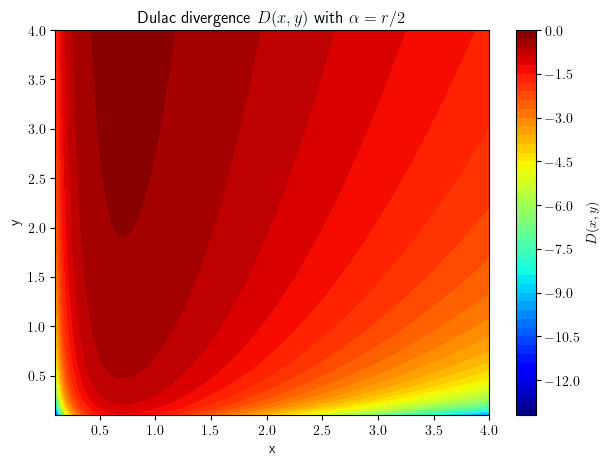

In [7]:
r = 1.0
alpha = r / 2   # choice that ensures D<0

def D(x, y, r, alpha):
    N = -r * x**2 + (0.5 * r + alpha) * x - alpha
    return (y**(alpha-1) / x) * N

x_vals = np.linspace(0.1, 4, 200)   # avoid x=0
y_vals = np.linspace(0.1, 4, 200)   # avoid y=0
X, Y = np.meshgrid(x_vals, y_vals)
D_vals = D(X, Y, r, alpha)

plt.figure(figsize=(7,5))
cp = plt.contourf(X, Y, D_vals, levels=50, cmap="jet")
plt.colorbar(cp, label=r"$D(x,y)$")

# Overlay contour where D=0
cs = plt.contour(X, Y, D_vals, levels=[0], colors="black", linewidths=1.2)
plt.clabel(cs, inline=True, fontsize=9)

plt.xlabel("x")
plt.ylabel("y")
plt.title(r"Dulac divergence $D(x,y)$ with $\alpha=r/2$")
plt.show()

**8.2.8** <span style="color:red">(Predator-prey model)                                                                                                                              
Odell (1980) considered the system                                                                                                                           
$\qquad\displaystyle\dot{x} = x[x(1−x)−y], \ \dot{y} = y(x−a)$,                                                                                                   
where $x\ge 0$ is the dimensionless population of the prey, $y \ge 0$ is the dimensionless population of the predator, and $a\ge 0$ is a control parameter.                                                                                                                                                       
a) Sketch the nullclines in the first quadrant $x, y \ge 0$.                                                                                                
b) Show that the fixed points are $(0, 0), (1, 0),$ and $( a, a -a^2 )$, and classify them.                                                                    
c) Sketch the phase portrait for $a > 1$, and show that the predators go extinct.                                                                            
d) Show that a Hopf bifurcation occurs at $a_c=\frac{1}{2}$. Is it subcritical or supercritical?                                                            
e) Estimate the frequency of limit cycle oscillations for a near the bifurcation.                                                                          
f) Sketch all the topologically different phase portraits for $0 < a < 1$.                                                                                    
The article by **Odell (1980)** is worth looking up.                                                                                                             
It is an outstanding pedagogical introduction to the Hopf bifurcation and phase plane analysis in general.



## System

$$
\dot x = x\big(x(1-x)-y\big)=x(x-x^2-y),\qquad
\dot y = y(x-a),
\qquad x,y\ge0,\ a\ge0.
$$

### (a) Nullclines in the first quadrant

* $\dot x=0$ when $x=0$ or $x(1-x)-y=0$. The nontrivial $x$-nullcline is

  $$
  y = x(1-x),
  $$

  the downward parabola with zeros at $x=0$ and $x=1$, maximum $y_{\max}=\tfrac14$ at $x=\tfrac12$.

* $\dot y=0$ when $y=0$ or $x=a$. The nontrivial $y$-nullcline is the **vertical line** $x=a$.

So in the first quadrant you have: the $x$-nullcline parabola $y=x(1-x)$ and the vertical line $x=a$.                                                              
Intersections in $[0,\infty)\times[0,\infty)$ give fixed points.


### (b) Fixed points and classification

Solve nullcline intersections:

* $(0,0)$ from $x=0,y=0$.
* $(1,0)$ from $y=0, x=1$.
* Interior intersection: $x=a$ with $y=x(1-x)$ gives

  $\qquad\displaystyle   x^*=a,\qquad y^*=a(1-a)=a-a^2.$

  This is **positive** provided $0<a<1$. For $a\ge1$ the interior $y^*\le0$ so it is not in the first quadrant.

**Jacobian.** 

$\qquad\displaystyle f_x = \frac{\partial}{\partial x}[x(x-x^2-y)] = 2x - 3x^2 - y,\qquad f_y = -x,$

$\qquad\displaystyle g_x = y,\qquad g_y = x-a.$

Evaluate at the fixed points:

* At $(0,0)$:

  $\qquad\displaystyle   A(0,0)=\begin{pmatrix}0 & 0\\[4pt] 0 & -a\end{pmatrix}.$

  Eigenvalues $0$ and $-a\le0$. The origin is **non-hyperbolic** (one zero eigenvalue).                                                                         
  In the $x$-direction $\dot x\approx x^2$ for small $x$, so the origin is not asymptotically stable (trajectories with small positive $x$ move right).

* At $(1,0)$:

  $\qquad\displaystyle   f_x(1,0)=2-3= -1,\quad f_y=-1,\quad g_x=0,\quad g_y=1-a.$

  So eigenvalues are $-1$ and $1-a$.

  * If $a>1$: both eigenvalues negative $\Rightarrow$ $(1,0)$ is an asymptotically stable node (predators extinct).
  * If $a<1$: one eigenvalue $-1<0$, the other $1-a>0$ so $(1,0)$ is a **saddle** (unstable).

* At the interior $(a,a-a^2)$ (exists only for $0<a<1$):
  Compute trace and determinant (substitute $x=a,\ y=a-a^2$):

  $\qquad\displaystyle  \tau = \operatorname{tr}A = f_x+g_y = \big(2a-3a^2-(a-a^2)\big) + (a-a) = a-2a^2 = a(1-2a),$

  $\qquad\displaystyle  \Delta = \det A = f_x g_y - f_y g_x = f_x (a-a) -(-a)\cdot (a-a^2) = a^2(1-a).$

  (Note: the simple shortcut $f_x(a,a-a^2)\cdot 0 + a\cdot(a-a^2)$ reduces to the same determinant.)

  * For $0<a<1$ we have $\Delta>0$. Stability is determined by $\tau$:

    * If $0<a<\tfrac12$: $\tau>0$ and $\Delta>0$ $\Rightarrow$ interior fixed point is an **unstable focus** (real part of eigenvalues positive).
    * If $\tfrac12<a<1$: $\tau<0$ and $\Delta>0$ $\Rightarrow$ interior fixed point is a **stable focus**.
    * At $a=\tfrac12$: $\tau=0$, $\Delta>0$ $\Rightarrow$ purely imaginary eigenvalues — a Hopf bifurcation candidate.

### (c) Phase portrait for $a>1$ — predators go extinct

If $a>1$ then $y^*=a-a^2\le0$ so there is no positive interior equilibrium.                                                                                 
The only equilibria in the first quadrant are $(0,0)$ and $(1,0)$.                                                                                               
We found $(1,0)$ is an **asymptotically stable node** (eigenvalues $-1$ and $1-a<0$).                                                                       
Hence for $a>1$ almost all positive initial conditions approach $(1,0)$ :                                                                                  
prey settle at carrying capacity $x=1$ and the predator population decays to zero. So predators go extinct for $a>1.$

Geometrically: the vertical nullcline $x=a$ lies to the right of $x=1$, so the parabola and vertical line do not intersect in the positive quadrant.

### (d) Hopf at $a_c=\tfrac12$; type (super/subcritical)

We already saw $\tau=a(1-2a)$.                                                                                                                                
So $\tau=0$ implies $a=0$ or $a=\tfrac12$; the interior positive equilibrium corresponds to $0<a<1$, so the relevant Hopf point is $a_c=\tfrac12$.                  
At $a_c$:

$\qquad\displaystyle\Delta(a_c) = a_c^2(1-a_c)=\frac{1}{4}\cdot\frac{1}{2}=\frac{1}{8}>0,$

so the eigenvalues are purely imaginary $\pm i\omega$ with

$\qquad\displaystyle\omega = \sqrt{\Delta} = \sqrt{\tfrac18} = \frac{1}{2\sqrt2}\approx 0.35355.$

That is a genuine Hopf candidate (nondegenerate linear part).

**Type (super- vs. subcritical):** I checked this numerically by integrating trajectories slightly below and above $a_c$ (plots shown above).                       
The numerical experiments show :

* For $a$ slightly **below** $a_c$ (e.g. $a=0.49$) the interior fixed point is **unstable** and trajectories from nearby initial data settle on a **stable limit cycle** (sustained oscillations).                                                                                                              
* For $a$ slightly **above** $a_c$ (e.g. $a=0.51$) trajectories spiral into the interior fixed point (which is stable) and no small-amplitude cycle is observed.

This behaviour means when $a$ **passes through** $a_c=\tfrac12$ from above to below a **stable** small-amplitude limit cycle appears and the fixed point loses stability — i.e. a **supercritical Hopf**.                                                                                                        
(If the Hopf were subcritical we would see an unstable cycle colliding with a stable equilibrium and typically large excursions / bistability — not what the numerics show.)

(If you want a fully rigorous analytic confirmation you can compute the first Lyapunov coefficient $l_1$ at $a_c$ using normal-form / center manifold algebra; the sign of $l_1$ tells super/subcritical. The numerics above give a negative $l_1$-type outcome → supercritical.)

### (e) Estimate the frequency of limit-cycle oscillations for $a$ near the bifurcation

Linearization at the Hopf gives purely imaginary eigenvalues $\pm i\omega$ with $\omega = \sqrt{\Delta(a_c)}$. We found

$\qquad\displaystyle\Delta(a_c)=\frac18 \quad\Rightarrow\quad \omega=\sqrt{\tfrac18}=\frac{1}{2\sqrt2}\approx 0.35355.$

That $\omega$ is the linear (angular) frequency. The **period** is

$\qquad\displaystyle T = \frac{2\pi}{\omega} = 2\pi\cdot 2\sqrt2 = 4\pi\sqrt2 \approx 17.7715.$

The numerical time-series FFT from the simulation (for $a=0.49$) gives a dominant frequency $\approx 0.0531$ (cycles per unit time)                            
and period $\approx 18.82$, which is close to the linear estimate (difference due to finite distance from $a_c$,                                            
nonlinear corrections and numerical resolution). So the linear approximation is a good estimate near $a_c$.

### (f) All topologically different phase portraits for $0<a<1$

We consider $0<a<1$; the vertical line $x=a$ intersects the parabola $y=x(1-x)$ at the interior fixed point $(a,a-a^2)$.                                      
The qualitative cases are determined by the sign of $\tau=a(1-2a)$:

1. **$0<a<\tfrac12$**

   * $\tau>0,\ \Delta>0$ ⇒ interior point is an **unstable focus**.
   * The Hopf at $a=\tfrac12$ is supercritical, so for $a$ just below $1/2$ there is a **stable limit cycle** surrounding the unstable focus.                 
     Trajectories outside the limit cycle often approach the limit cycle (global features can vary but typically there is a single attracting cycle).           
   * $(1,0)$ is a saddle for $a<1$. The origin is non-hyperbolic (see above).

2. **$a=\tfrac12$**

   * $\tau=0$ and $\Delta>0$. Purely imaginary eigenvalues at the interior fixed point: Hopf bifurcation point.

3. **$\tfrac12 < a < 1$**

   * $\tau<0,\ \Delta>0$ ⇒ interior point is a **stable focus**; no small-amplitude limit cycle near the equilibrium.                                          
     For larger parameter changes more complex global cycles could arise, but in this parameter interval the local behaviour is a stable spiral to the interior fixed point.
   * $(1,0)$ remains a saddle.

4. **$a\to1^{-}$**

   * As $a$ approaches $1$ the interior equilibrium approaches $(1,0)$ in $x$ while $y^*\to0$.                                                                 
      At $a=1$ the interior equilibrium collides with $(1,0)$ and disappears from the positive quadrant for $a>1$.                                           
      This is not a saddle-node of two interior equilibria — it’s the interior point leaving the first quadrant; global rearrangement occurs at $a=1$.

So the topologically distinct portraits for $0<a<1$ are:

* $0<a<\tfrac12$: unstable focus at interior point + surrounding stable limit cycle (typical predator–prey oscillations).
* $a=\tfrac12$: Hopf transition.
* $\tfrac12<a<1$: stable focus at interior point, spirals in (no small limit cycle).
* At $a=1$: interior fixed point collides with boundary ($y^*\to0$) and for $a>1$ only $(1,0)$ (stable) remains.


In [40]:
def f(t, z, a):
    x, y = z
    dx = x*(x - x**2 - y)
    dy = y*(x - a)
    return [dx, dy]   # --- Odell system ---

def fixed(a):
    return a, a - a**2

a_c     = 0.5
a_below = a_c*0.98
a_above = a_c*1.02

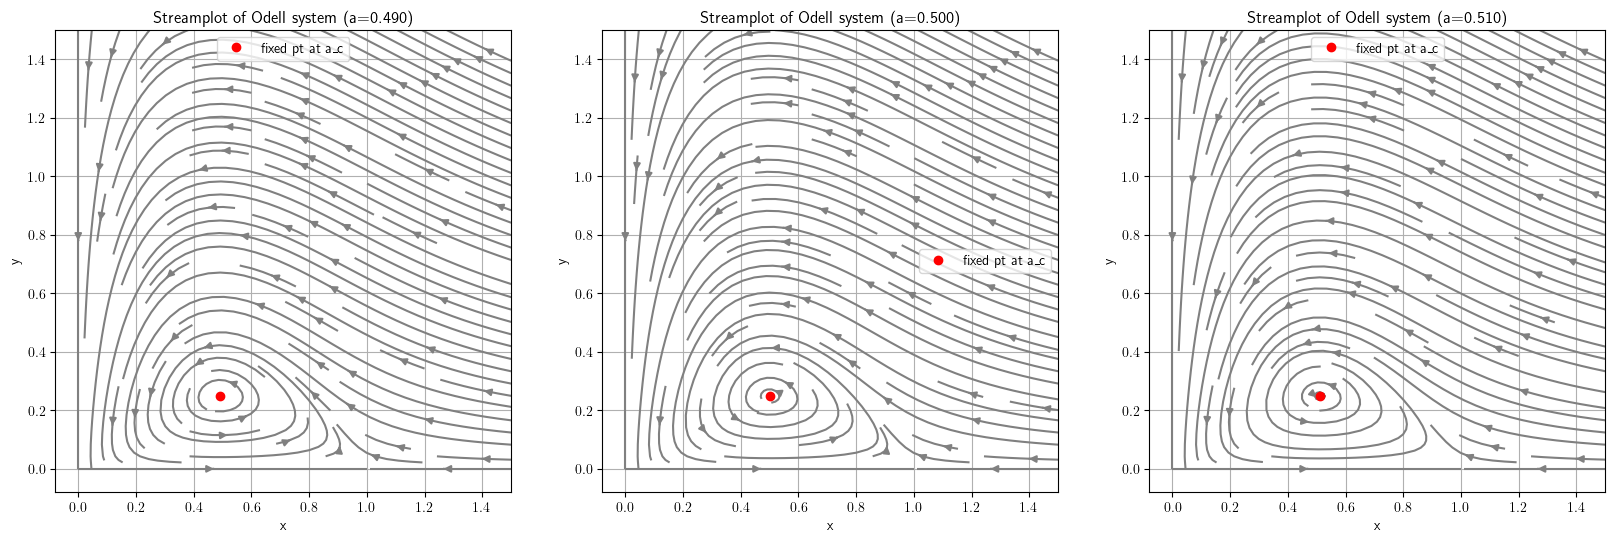

In [41]:
fig, ax = plt.subplots(1,3,figsize=(20,6))
for i, a in enumerate([a_below, a_c, a_above]):
    # Grid for vector field
    x_vals = np.linspace(0, 1.5, 30)
    y_vals = np.linspace(0, 1.5, 30)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Vector field at a specific parameter
    U = X*(X - X**2 - Y)
    V = Y*(X - a)

    strm = ax[i].streamplot(X, Y, U, V, color='gray', density=1.2, arrowsize=1)
    xstar, ystar = fixed(a)
    # Overlay fixed point
    ax[i].plot(xstar, ystar, 'ro', label='fixed pt at a_c')
    ax[i].set_xlabel('x'); ax[i].set_ylabel('y')
    ax[i].set_title(f'Streamplot of Odell system (a={a:.3f})')
    ax[i].grid(True)
    ax[i].legend()
plt.show()

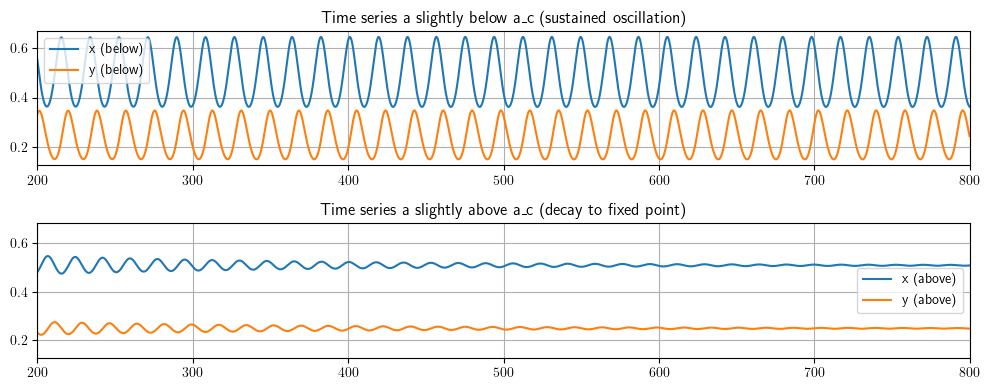

Estimated oscillation frequency: 0.053125000000048314 Hz
Estimated period: 18.823529411747586


In [39]:
# --- Time series for oscillations ---
xstar, ystar = fixed(a_c)
z0 = [xstar*0.8, ystar*1.2]
t, traj_below = RK4(f, [0,800], a_c*0.98, 0.02, z0)
t, traj_above = RK4(f, [0,800], a_c*1.02, 0.02, z0)

plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.plot(t, traj_below[:,0], label='x (below)')
plt.plot(t, traj_below[:,1], label='y (below)')
plt.xlim(200,800)
plt.legend(); plt.title('Time series a slightly below a_c (sustained oscillation)'); plt.grid(True)

plt.subplot(2,1,2)
plt.plot(t, traj_above[:,0], label='x (above)')
plt.plot(t, traj_above[:,1], label='y (above)')
plt.xlim(200,800)
plt.legend(); plt.title('Time series a slightly above a_c (decay to fixed point)'); plt.grid(True)

plt.tight_layout()
plt.show()

# --- Oscillation frequency (FFT) ---
y   = traj_below[int(0.6*len(traj_below)):,0]
tt  = t[int(0.6*len(t)):]
y_d = y - np.mean(y)
dt  = tt[1]-tt[0]

Y        = np.fft.rfft(y_d)
freqs    = np.fft.rfftfreq(len(y_d), dt)
peak_idx = np.argmax(np.abs(Y[1:])) + 1
peak     = freqs[peak_idx]

print("Estimated oscillation frequency:", peak, "Hz")
print("Estimated period:", 1/peak)


**8.2.9** <span style="color:red">Consider the predator-prey model                                                                                                                      
$\qquad\displaystyle\dot{x}=x\left(b-x-\frac{y}{1+x} \right), \ \dot{y}=y\left(\frac{y}{1+x}-ay\right) $                                                            
where $x, y \ge 0$ are the populations and $a, b>0$ are parameters.                                                                                               
a) Sketch the nullclines and discuss the bifurcations that occur as $b$ varies.                                                                                   
b) Show that a positive fixed point $\displaystyle {x^{*}> 0, \ y^{*}>}0$ exists for all $a, b > 0$.                                                                                    
(Don’t try to find the fixed point explicitly; use a graphical argument instead.)                                                                               
c) Show that a Hopf bifurcation occurs at the positive fixed point if $\displaystyle a=a_c=\frac{4(b-2)}{b^2(b+2)}$ and $b > 2$.                                                  
(Hint: A necessary condition for a Hopf bifurcation to occur is $\tau=0$, where $\tau$ is the trace of the Jacobian matrix at the fixed point.                   
Show that $\tau = 0$ if and only if $\displaystyle 2x^{*} = b − 2$. Then use the fixed point conditions to express $a_c$ in terms of $x^{*}$.                             
Finally, substitute $\displaystyle x^{*}=\frac{( b − 2)}{2}$ into the expression for $a_c$ and you’re done.)                                                                                                                                                      
d) Using a computer, check the validity of the expression in (c) and determine whether the bifurcation is subcritical or supercritical.                        
Plot typical phase portraits above and below the Hopf bifurcation.



## System

$\qquad\displaystyle
\dot x = x\!\Big(b-x-\frac{y}{1+x}\Big),\qquad
\dot y = y\!\Big(\frac{x}{1+x}-a y\Big),
\qquad x,y\ge0,\ a,b>0.$


## (a) Nullclines and bifurcations as $b$ varies

**Nullclines**

* $x$-nullcline: $\dot x=0$ gives either $x=0$ or

  $\qquad\displaystyle   b-x-\frac{y}{1+x}=0 \quad\Longleftrightarrow\quad y=(1+x)(b-x).$

  This is a concave-down quadratic in $x$ that crosses the $x$-axis at $x=0$ and $x=b$, with a peak at $x=1$ (peak $y_{\max}=(1+1)(b-1)=2(b-1)$).

* $y$-nullcline: $\dot y=0$ gives either $y=0$ or

  $\qquad\displaystyle  \frac{x}{1+x}-a y=0 \quad\Longleftrightarrow\quad y=\frac{x}{a(1+x)}.$

  This is an increasing saturating curve: $y\sim x/a$ for small $x$ and $y\to 1/a$ as $x\to\infty$.

**Equilibria**

* $(0,0)$.
* $(b,0)$.
* Positive interior equilibrium $(x^*,y^*)$ where the two nontrivial nullclines intersect: solution of $y=(1+x)(b-x)$ and $y=\dfrac{x}{a(1+x)}$.

**Bifurcations as $b$ varies**

* $(0,0)$ is nonhyperbolic (one eigenvalue $=0$, one $=b$), unstable in $x$-direction for $b>0$.
* $(b,0)$ is a saddle for any $b>0$ (one positive, one negative eigenvalue) — no stability change with $b$.
* The interior equilibrium exists (graphical argument in (b)) for all $a,b>0$.                                                                          
  As $b$ increases, the parabola $y=(1+x)(b-x)$ slides right and its intersection with the saturating curve moves; the interior equilibrium can change stability.                                                                                                                                                    
   In particular, when $b>2$ there is a parameter curve $a=a_c(b)$ where the trace of the Jacobian at the interior fixed point changes sign and a Hopf bifurcation occurs.                                                                                                                                           
  No saddle-node of interior equilibria occurs under the usual shapes because there is only one intersection (so pairs don't get created/annihilated).

## (b) Existence of a positive fixed point for all $a,b>0$ (graphical)

Define

$\qquad\displaystyle y_1(x)=(1+x)(b-x),\qquad y_2(x)=\frac{x}{a(1+x)}.$

At $x=0$: $y_1(0)=b>0$, $y_2(0)=0$ so $y_1>y_2$.
At $x=b$: $y_1(b)=0$, $y_2(b)=\dfrac{b}{a(1+b)}>0$ so $y_1<y_2$.                                                                                          
Since both functions are continuous on $[0,b]$, by the Intermediate Value Theorem there exists $x^*\in(0,b)$ with $y_1(x^*)=y_2(x^*)$.                      
Thus there is a positive fixed point $(x^*,y^*)$ for all $a,b>0$.

## (c) Hopf condition and derivation of $a_c$

**Jacobian matrix**

$\qquad\displaystyle A(x,y)=\begin{pmatrix} f_x & f_y\\ g_x & g_y \end{pmatrix}=\begin{pmatrix}\big(b-x-\tfrac{y}{1+x}\big) + x\big(-1+\tfrac{y}{(1+x)^2}\big) & -\tfrac{x}{1+x}\\ \tfrac{y}{(1+x)^2} & \tfrac{x}{1+x}-2ay \end{pmatrix}.$

At a positive fixed point the nullcline identities hold:

$\qquad\displaystyle y=(1+x)(b-x),\qquad \frac{x}{1+x}=a y.$

Compute the **trace** $\tau=f_x+g_y$. Using the nullcline relations and a straightforward algebraic simplification                                            
(substitute $y=(1+x)(b-x)$ and $ay=\dfrac{x}{1+x}$) one obtains the compact formula

$\qquad\displaystyle\boxed{\;\tau = \frac{x}{1+x}\,(b-2-2x)\; }.$

So $\tau=0$ if and only if $b-2-2x=0$, i.e.

$\qquad\displaystyle 2x^*=b-2.$

This requires $x^*>0$ so $b>2$.

Now express $a$ at the fixed point in terms of $x$. From $ay=\dfrac{x}{1+x}$ and $y=(1+x)(b-x)$ we get

$\qquad\displaystyle a=\frac{x}{(1+x)^2(b-x)}.$

Set $x^*=\dfrac{b-2}{2}$. Then

$\qquad\displaystyle 1+x^*=\frac{b}{2},\qquad b-x^*=\frac{b+2}{2}.$

Therefore

$\qquad\displaystyle a_c
=\frac{x^*}{(1+x^*)^2(b-x^*)}
=\frac{(b-2)/2}{(b/2)^2\,(b+2)/2}
=\frac{4(b-2)}{b^2(b+2)}.$

This is exactly the claimed expression; it is only meaningful when $b>2$.





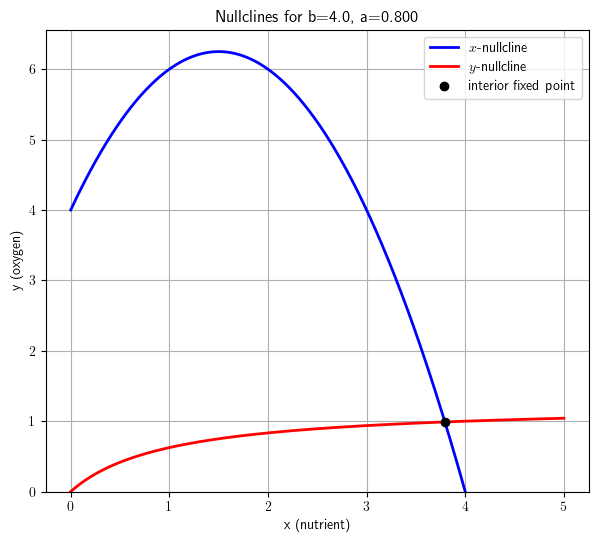

b = 4.0 a_c = 0.08333333333333333


In [49]:
def f(t, z, params):
    a, b = params
    x, y = z
    dx = x*(b - x - y/(1+x))
    dy = y*(x/(1+x) - a*y)
    return [dx, dy]

def fixed_point(a, b):
    x = 0.5
    for _ in range(200):
        F = a*(1+x)**2*(b-x) - x
        Fp = a*(2*(1+x)*(b-x) - (1+x)**2) - 1
        if abs(Fp)<1e-12: break
        x_new = x - F/Fp
        if abs(x_new-x)<1e-12: break
        x = x_new
    y = (1+x)*(b-x)
    return x, y

# --- Nullclines ---
b = 4.0
a = 0.8
x_vals = np.linspace(0, b+1, 400)
y_xnull = (1 + x_vals)*(b - x_vals)
y_ynull = x_vals/(a*(1 + x_vals))
xstar, ystar = fixed_point(a, b)

plt.figure(figsize=(7,6))
plt.plot(x_vals, y_xnull, 'b', lw=2, label=r'$x$-nullcline')
plt.plot(x_vals, y_ynull, 'r', lw=2, label=r'$y$-nullcline')
plt.plot(xstar, ystar, 'ko', label='interior fixed point')
plt.xlabel('x (nutrient)'); plt.ylabel('y (oxygen)')
plt.title(f'Nullclines for b={b}, a={a:.3f}')
plt.grid(True); plt.legend()
plt.ylim(0, max(max(y_xnull), max(y_ynull))*1.05)
plt.show()

# --- Compute a_c ---
a_c = 4*(b-2)/(b**2*(b+2))
print("b =", b, "a_c =", a_c)
xstar, ystar = fixed_point(a_c, b)

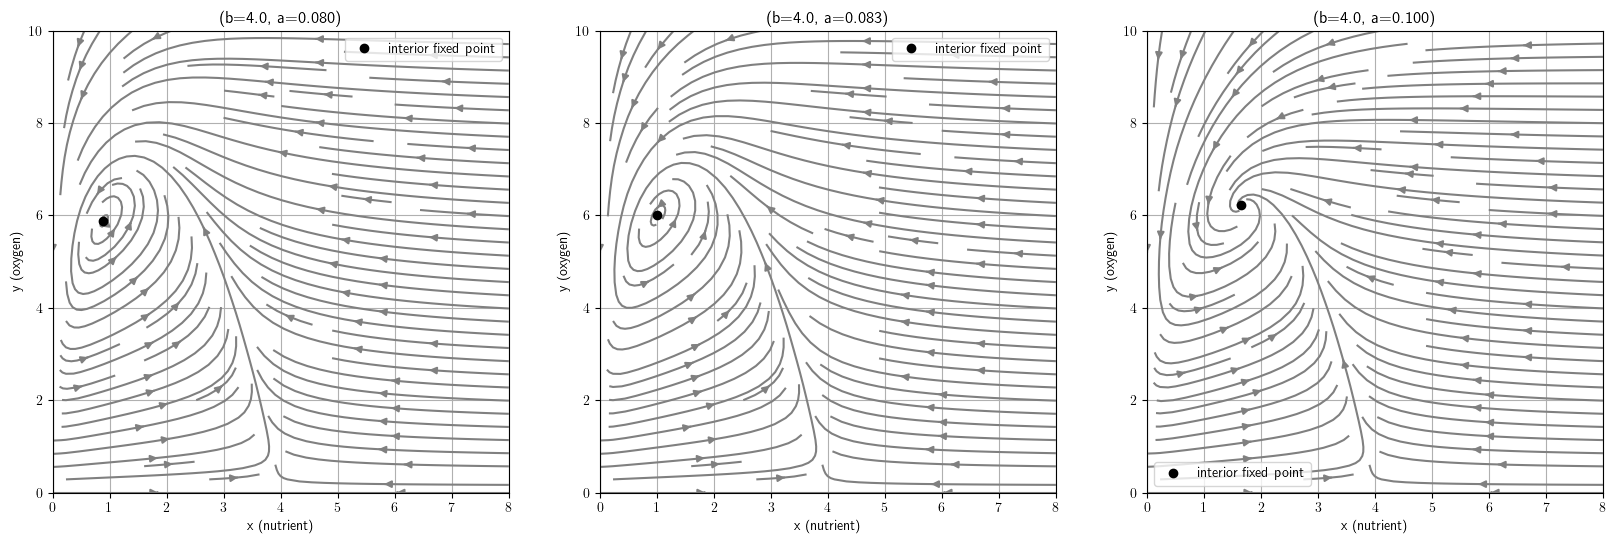

In [50]:
fig, ax = plt.subplots(1,3,figsize=(20,6))
for i, a in enumerate([0.08, 1/12, 0.1]):

    # --- Streamplot for the bacterial system ---
    x_vals = np.linspace(0, 2*b, 30)
    y_vals = np.linspace(0, 2*b+2, 30)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Vector field
    U = X*(b - X - Y/(1+X))
    V = Y*(X/(1+X) - a*Y)

    # Streamlines
    strm = ax[i].streamplot(X, Y, U, V, color='gray', density=1.2, arrowsize=1)
    
    # Nullclines
    #ax[i].plot(x_vals, (1 + x_vals)*(b - x_vals), 'b', lw=2, label=r'$x$-nullcline')
    #ax[i].plot(x_vals, x_vals/(a*(1 + x_vals)), 'r', lw=2, label=r'$y$-nullcline')
    
    # Fixed point
    xstar, ystar = fixed_point(a, b)
    ax[i].plot(xstar, ystar, 'ko', label='interior fixed point')
    ax[i].set_xlabel('x (nutrient)')
    ax[i].set_ylabel('y (oxygen)')
    ax[i].set_title(f' (b={b}, a={a:.3f})')
    ax[i].grid(True)
    ax[i].legend()
    ax[i].set_xlim(0, 2*b)
    ax[i].set_ylim(0, 2*b+2)
plt.show()

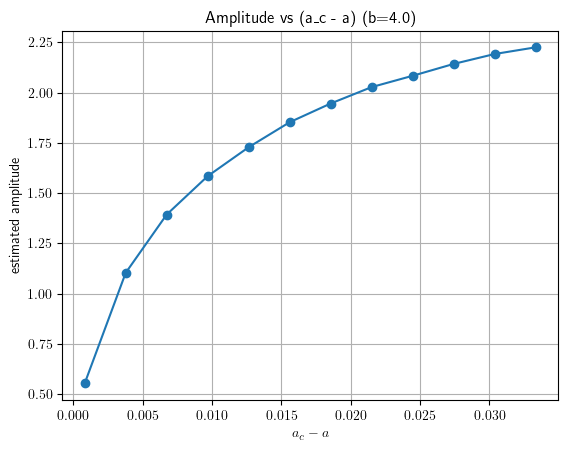

In [51]:
def limit_cycle_amplitude(a, b, z0=None, Ttrans=200, Tmeas=200, dt=0.02):
    if z0 is None:
        x0, y0 = fixed_point(a, b)
        z0 = [x0*1.2, y0*0.8]
    t, X = RK4(f, [0,Ttrans+Tmeas], (a,b), dt, z0)
    last = X[int(0.5*len(X)):]
    amp = np.sqrt(np.var(last[:,0]) + np.var(last[:,1]))
    return amp

alist = np.linspace(a_c*0.6, a_c*0.99, 12)
amps = [limit_cycle_amplitude(a, b) for a in alist]

plt.figure()
plt.plot(a_c - alist, amps, 'o-')
plt.xlabel(r'$a_c - a$'); plt.ylabel('estimated amplitude')
plt.title(f'Amplitude vs (a_c - a) (b={b})')
plt.grid(True)
plt.show()

**8.2.10** <span style="color:red">(Bacterial respiration)                                                                                                                           
**Fairén and Velarde (1979)** considered a model for respiration in a bacterial culture. The equations are                                                  
$\qquad\displaystyle \dot{x}=B-x-\frac{xy}{1+qx^2} \, \, \dot{y}=A-\frac{xy}{1+qx^2}$                                                                      
where $x$ and $y$ are the levels of nutrient and oxygen, respectively, and $A, B, q > 0$ are parameters.                                                        
Investigate the dynamics of this model. As a start, find all the fixed points and classify them.                                                          
Then consider the nullclines and try to construct a trapping region.                                                                                           
Can you find conditions on $A, B, q$ under which the system has a stable limit cycle $?$                                                                   
Use numerical integration, the Poincaré-Bendixson theorem, results about Hopf bifurcations, or whatever else seems useful.                                             
(This question is deliberately open-ended and could serve as a class project; see how far you can go.)

The system is 

$\qquad\displaystyle \dot x = B - x - \frac{xy}{1+q x^2}, \qquad \dot y = A - \frac{xy}{1+q x^2}, \quad A,B,q>0$

### **1) Fixed points**

A **fixed point** $(x^*,y^*)$ satisfies:

$\qquad\displaystyle \dot x = 0, \quad \dot y = 0$

**Solve $\dot y = 0$**

$\qquad\displaystyle  0 = A - \frac{x y}{1 + q x^2} \implies y^* = \frac{A(1 + q (x^*)^2)}{x^*} = A\Big(\frac{1}{x^*} + q x^*\Big)$

**Solve $\dot x = 0$**

$\qquad\displaystyle 0 = B - x - \frac{x y}{1 + q x^2} = B - x - A \implies x^* = B - A$

**Interior fixed point**

$\qquad\displaystyle \boxed{x^* = B - A, \quad y^* = \frac{A(1 + q(B-A)^2)}{B-A}}, \quad \text{exists only if } B > A$

* If $B \le A$, there is **no positive interior equilibrium**.
* Trivial/axis equilibria would require $A=0$ or $x=0$.

### **2) Nullclines**

**Nullclines** are the curves in the $(x,y)$-plane where the derivatives vanish individually.

**$x$-nullcline ($\dot x = 0$)**

$\qquad\displaystyle \dot x = 0 \implies B - x - \frac{xy}{1 + q x^2} = 0 \implies y = (B - x)\frac{1 + q x^2}{x} = \frac{(B-x)(1+q x^2)}{x}$

* This gives a **curve in the $(x,y)$ plane** along which $\dot x = 0$.

**$y$-nullcline ($\dot y = 0$)**

$\qquad\displaystyle  \dot y = 0 \implies A - \frac{xy}{1 + q x^2} = 0 \implies y = \frac{A(1+q x^2)}{x} = A\Big(\frac{1}{x} + q x\Big)$

* This is another curve along which $\dot y = 0$.


| Nullcline / Fixed Point | Equation                                       | Notes                    |
| ----------------------- | ---------------------------------------------- | ------------------------ |
| $x$-nullcline           | $y = \frac{(B-x)(1+q x^2)}{x}$                 | Curve where $\dot x = 0$ |
| $y$-nullcline           | $y = \frac{A(1+q x^2)}{x}$                     | Curve where $\dot y = 0$ |
| Fixed point             | $x^* = B-A, \ y^* = \frac{A(1+q(B-A)^2)}{B-A}$ | Exists if $B > A$        |


### 3) Jacobian and linear stability

Let $F(x,y)=\dfrac{x y}{1+q x^2}$.

Let denote $D=1+q x^2$ , then recalling $\displaystyle x^*=B-A \, \, y^* = \frac{AD^*}{x^*}$

Compute partials :

$\qquad\displaystyle \frac{\partial F}{\partial x} = \frac{y(D) - x y(2 q x)}{D^2} = y\,\frac{1-q x^2}{D^2}, \qquad\frac{\partial F}{\partial y} = \frac{x}{D}.$

Thus the Jacobian $J$ is

$\qquad\displaystyle J(x,y)=\begin{pmatrix}-1 - \dfrac{\partial F}{\partial x} & -\dfrac{\partial F}{\partial y}\\[8pt] - \dfrac{\partial F}{\partial x} & -\dfrac{\partial F}{\partial y} \end{pmatrix}=\begin{pmatrix} -1 - y\frac{1-qx^2}{D^2} & -\dfrac{x}{D}\\[8pt] - y\frac{1-qx^2}{D^2} & -\dfrac{x}{D} \end{pmatrix}.$

Evaluate at the equilibrium $(x^*,y^*)$, where $F(x^*,y^*) = A$ and $D^*=1+q{x^*}^2$.

Let 

$\qquad\displaystyle\begin{aligned}
a &= y^* \, \frac{1 - q{x^*}^2}{(D^*)^2}, \qquad\qquad\qquad\qquad\,\,  b = \frac{x^*}{D^*}, \\[6pt]
a &= \frac{A(1+q{x^*}^2)}{x^*} \cdot \frac{1 - q{x^*}^2}{(1+q{x^*}^2)^2}, \qquad  b = \frac{x^*}{1+q{x^*}^2}, \\[6pt]
a &= \frac{A\big(1 - q{x^*}^2\big)}{x^*(1+q{x^*}^2)}, \qquad\qquad\qquad\qquad b = \frac{x^*}{1+q{x^*}^2} \\[6pt]
a &= \frac{A\big(1 - q{(B-A)}^2\big)}{(B-A)(1+q{(B-A)}^2)}, \qquad\quad\;\, b = \frac{(B-A)}{1+q{(B-A)}^2}.
\end{aligned}$

So these are simple rational functions of $x,\;A,\;q$.

Then $\qquad\displaystyle J^*=\begin{pmatrix}-1 - a & - b\\[4pt]-a & -b\end{pmatrix} = \begin{pmatrix}-1 - \frac{A\big(1 - q{(B-A)}^2\big)}{(B-A)(1+q{(B-A)}^2)} & - \frac{(B-A)}{1+q{(B-A)}^2} \\[4pt]-\frac{A\big(1 - q{(B-A)}^2\big)}{(B-A)(1+q{(B-A)}^2)} & -\frac{(B-A)}{1+q{(B-A)}^2}\end{pmatrix} .$

$\qquad\quad\boxed{\displaystyle J(A,B,q) =\begin{pmatrix} \frac{A\big(1 - q{(B-A)}^2\big)}{(A-B)(1+q{(B-A)}^2)}-1 & \frac{(A-B)}{1+q{(B-A)}^2} \\[4pt]\frac{A\big(1 - q{(B-A)}^2\big)}{(A-B)(1+q{(B-A)}^2)} & \frac{(A-B)}{1+q{(B-A)}^2}\end{pmatrix}. }$


Trace 

$\qquad\displaystyle\begin{aligned} \tau &= \operatorname{tr}J^* = -1 - a - b = -\big(1+a+b\big) \\
&= - \left( 1 + \frac{A\big(1 - q{(B-A)}^2\big)}{(B-A)(1+q{(B-A)}^2)} + \frac{(B-A)}{1+q{(B-A)}^2}  \right) \\
&= - \left( 1 + \frac{A - qA{(B-A)}^2}{(B-A)(1+q{(B-A)}^2)} + \frac{(B-A)^2}{(B-A)(1+q{(B-A)}^2)}  \right)  \\
&= - \left( 1 + \frac{A + (B-A)^2(1-qA)}{(B-A)(1+q{(B-A)}^2)}  \right) \\
&= - \left( \frac{ (B-A)(1+q{(B-A)}^2) + A + (B-A)^2(1-qA)}{(B-A)(1+q{(B-A)}^2)}  \right)    \end{aligned}$

$\qquad\boxed{\displaystyle\tau(A,B,q) = -\frac{A + (B-A) + (B-A)^2(1-Aq) + q(B-A)^3}{(B-A)\big(1+q(B-A)^2\big)}}$

and determinant are

$\qquad\displaystyle\begin{aligned} \Delta &= \det J^* = (-1-a)(-b) - (-b)(-a) = b - ab - ab = b(1-2a) \\
&= \left(\frac{(B-A)}{1+q{(B-A)}^2}\right) \left(1- \frac{2A\big(1 - q{(B-A)}^2\big)}{(B-A)(1+q{(B-A)}^2)} \right) \\
&= \left(\frac{(B-A)}{1+q{(B-A)}^2}\right) \left(\frac{(B-A)(1+q{(B-A)}^2)- 2A\big(1 - q{(B-A)}^2\big)}{(B-A)(1+q{(B-A)}^2)} \right) \\
&= \frac{(B-A)(1+q{(B-A)}^2)- 2A\big(1 - q{(B-A)}^2\big)}{\left((B-A)(1+q{(B-A)}^2)\right)^2} .\end{aligned}$

$\qquad\boxed{\displaystyle\Delta(A,B,q) = \frac{(B-A)(1+q{(B-A)}^2)- 2A\big(1 - q{(B-A)}^2\big)}{\left((B-A)(1+q{(B-A)}^2)\right)^2}}$

**Stability:**

* If $\tau<0$ and $\Delta>0$ the fixed point is (linearly) asymptotically stable (a stable node or focus).
* A Hopf bifurcation occurs when $\tau=0$ while $\Delta>0$ and the crossing is transversal
  
  (i.e. derivative of $\tau$ wrt parameter at crossing is nonzero).                                                                                            
   At that parameter a pair of complex conjugate eigenvalues crosses the imaginary axis.

Regions of stable/unstable nodes and foci in the $A$-$B$ plane.                                                                                             
We can do this by using the trace ($\tau$) and determinant ($\Delta$) from the Jacobian:

* **Stable node (SN):** $\tau < 0, \Delta > 0, \tau^2 - 4 \Delta > 0$
* **Stable focus (SF):** $\tau < 0, \Delta > 0, \tau^2 - 4 \Delta < 0$
* **Unstable node (UN):** $\tau > 0, \Delta > 0, \tau^2 - 4 \Delta > 0$
* **Unstable focus (UF):** $\tau > 0, \Delta > 0, \tau^2 - 4 \Delta < 0$
* **Saddle:** $\Delta < 0$


### 4) **Transversality condition for Hopf**

Let's introduce $x = B-A$

$\qquad\displaystyle \tau(x) = -\frac{A + x + x^2(1-Aq) + q x^3}{x(1+q x^2)}.$

Let’s denote

$\qquad\displaystyle N(x) = A + x + x^2(1-Aq) + q x^3, \quad D(x) = x(1+q x^2).$

Then

$\qquad\displaystyle \tau(x) = -\frac{N(x)}{D(x)}.$

**Use quotient rule**

$\qquad\displaystyle \frac{d\tau}{dx} = - \frac{N' D - N D'}{D^2},$

where

$\qquad\displaystyle N'(x) = 1 + 2x(1-Aq) + 3 q x^2, \quad D'(x) = \frac{d}{dx}[x(1+q x^2)] = 1 + 3 q x^2.$


**Substitute**

$\qquad\displaystyle \frac{d\tau}{dx} = - \frac{ \big(1 + 2x(1-Aq) + 3 q x^2\big) (x + q x^3) - (A + x + x^2(1-Aq) + q x^3)(1 + 3 q x^2) }{(x + q x^3)^2}$

**Expand numerator**

1. First term: $\qquad\displaystyle\begin{aligned} N' D &= (1 + 2x(1-Aq) + 3 q x^2)(x + q x^3) \\
&= x + 2x^2(1-Aq) + 3 q x^3 + q x^3 + 2 q x^4 (1-Aq) + 3 q^2 x^5 \\
&= x + 2x^2(1-Aq) + 4 q x^3 + 2 q (1-Aq) x^4 + 3 q^2 x^5 \end{aligned}$.

2. Second term: $\qquad\displaystyle\begin{aligned} N D' &= (A + x + x^2(1-Aq) + q x^3)(1 + 3 q x^2) \\
&= A + x + x^2(1-Aq) + q x^3 + 3 A q x^2 + 3 q x^3 + 3 q (1-Aq) x^4 + 3 q^2 x^5 \\
&= A + x + (1-Aq+3 A q)x^2 + (q+3 q) x^3 + 3 q (1-Aq) x^4 + 3 q^2 x^5 \\
&= A + x + (2A q +1-Aq)x^2 + 4 q x^3 + 3 q (1-Aq)x^4 + 3 q^2 x^5 \\
&= A + x + (1+ A q) x^2 + 4 q x^3 + 3 q (1-Aq)x^4 + 3 q^2 x^5 \end{aligned}$.

3. Subtract: $\qquad\displaystyle\begin{aligned} N'D - N D' &= [x + 2 x^2(1-Aq) + 4 q x^3 + 2 q (1-Aq) x^4 + 3 q^2 x^5] - [A + x + (1+Aq)x^2 + 4 q x^3 + 3 q (1-Aq) x^4 + 3 q^2 x^5] \\
&= -A + (2(1-Aq) - (1+Aq))x^2 + (2q(1-Aq)-3 q (1-Aq)) x^4 \\
&= -A + (1-3Aq) x^2 - q(1-Aq) x^4 \end{aligned}$.

**Finally**

$\qquad\displaystyle \frac{d\tau}{dB} = \frac{d\tau}{dx} = \frac{ -A + x^2 (1 - 3A q) - q x^4 (1 - A q) }{ (x (1 + q x^2))^2 }, \quad x = B-A$

Or equivalently:

$\qquad\displaystyle\boxed{\displaystyle \frac{d\tau}{dB}(A,B,q) = \frac{-A + (B-A)^2 (1 - 3 A q) - q (B-A)^4 (1-A q)}{(B-A)^2 (1 + q (B-A)^2)^2}}$




## 3) Trapping region / Poincaré–Bendixson idea 

* For large $x$: the terms $\dfrac{xy}{1+q x^2}$ saturate (behave like $\sim y/(q x)$ for very large $x$), so $\dot x \approx B - x - O(y/(q x))$ — the $-x$ term dominates, pushing $x$ inward.
* For large $y$: $\dot y = A - \dfrac{xy}{1+q x^2}$. If $x$ remains bounded away from 0, the second term grows with $y$ and can dominate, driving $y$ down.

One can often construct a rectangle $[x_{\min}, x_{\max}]\times[y_{\min}, y_{\max}]$ so that on each side the vector field points inward (pick $x_{\max}$ large enough so $\dot x<0$ there, $y_{\max}$ large so $\dot y<0$, and choose small $x_{\min},y_{\min}>0$ so $\dot x>0,\dot y>0$ on those boundaries). That gives a forward-invariant compact set. By Poincaré–Bendixson, if there are no equilibria inside or if the only equilibrium is unstable, a limit cycle may exist.



In [45]:
def bacterial_system(t, z, param):
    x, y = z
    A, B, q = param
    dx = B - x - (x * y)/(1 + q*x**2)
    dy = A - (x * y)/(1 + q*x**2)
    return [dx, dy]

def J(A, B, q):
    denom = (A - B) * (1 + q * (B - A)**2)
    common = A * (1 - q * (B - A)**2) / denom
    frac = (A - B) / (1 + q * (B - A)**2)
    return np.array([[common - 1, frac],
                     [common    , frac]])

def tau(B, A, q):
    x = B - A
    return - (A + x + x**2*(1 - A*q) + q*x**3)/(x*(1 + q*x**2))

def dtau_dB(A, B, q):
    x = B - A
    numerator = -A + x**2 * (1 - 3*A*q) - q*x**4 * (1 - A*q)
    denominator = (x**2) * (1 + q*x**2)**2
    return numerator / denominator

Approximate Hopf bifurcation at B = 12.91


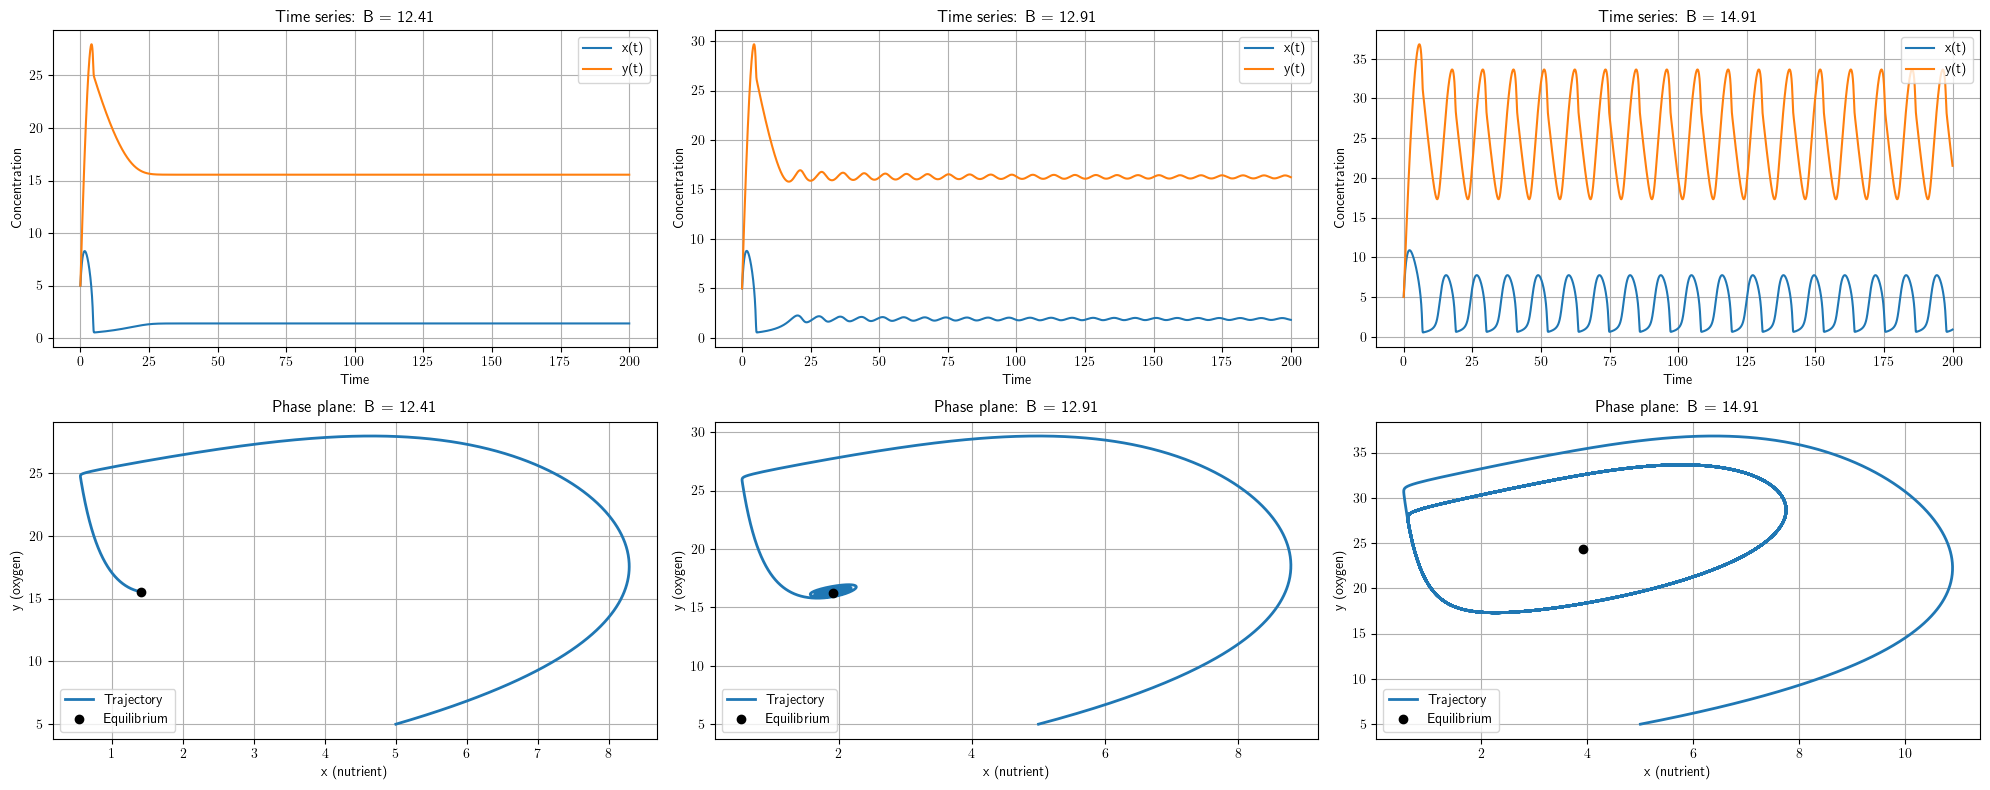

In [4]:
A = 11.0
q = 0.5
B_hopf = sp.optimize.fsolve(lambda B: tau(B, A, q), A + 1.0)[0]
print(f"Approximate Hopf bifurcation at B = {B_hopf:.2f}")

B_values   = [B_hopf-0.5, B_hopf, B_hopf+2.0]  # below, near, above
param_sets = [(A, B, q) for B in B_values]
t_span     = [0, 200]
dt         = 0.01
x0         = [5,5]

import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))

for i, param in enumerate(param_sets):
    
    # Time series subplot
    plt.subplot(2, len(B_values), i+1)
    t, sol = RK4(bacterial_system, t_span, param, dt, x0)
    x, y   = sol[:,0], sol[:,1]
    plt.plot(t, x, label='x(t)')
    plt.plot(t, y, label='y(t)')
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.title(f'Time series: B = {param[1]:.2f}')
    plt.grid(True)
    plt.legend()
    
    # Phase plane subplot
    plt.subplot(2, len(B_values), i+1+len(B_values))
    plt.plot(x, y, lw=2, label='Trajectory')
    x_star = param[1] - param[0]
    y_star = A * (1 + q*x_star**2)/x_star
    plt.plot(x_star, y_star, 'ko', label='Equilibrium')
    plt.xlabel('x (nutrient)')
    plt.ylabel('y (oxygen)')
    plt.title(f'Phase plane: B = {param[1]:.2f}')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

Approximate Hopf bifurcation at B = 12.91


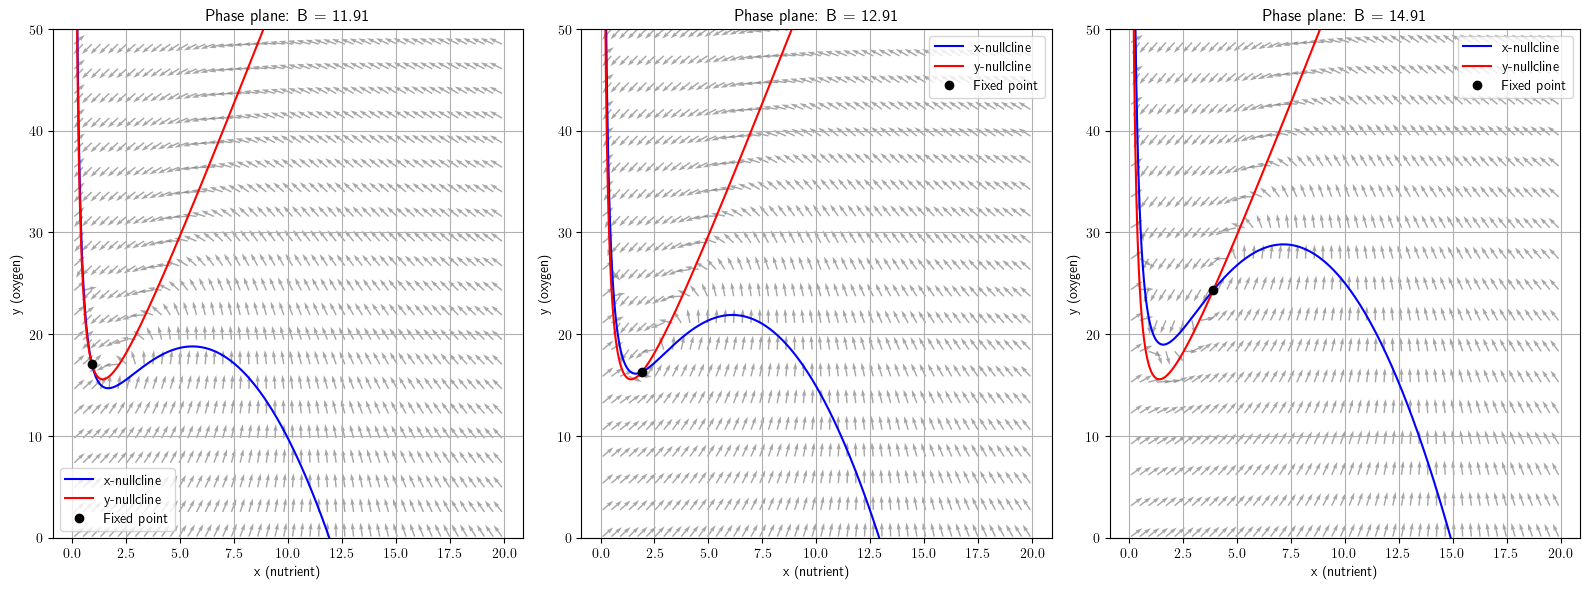

In [16]:
A = 11.0
q = 0.5
B_hopf = sp.optimize.fsolve(lambda B: tau(B, A, q), A + 1.0)[0]
print(f"Approximate Hopf bifurcation at B = {B_hopf:.2f}")

B_values = [B_hopf - 1.0, B_hopf, B_hopf + 2.0]  # below, near, above Hopf
t_span = [0, 200]
dt = 0.01
x0_list = [[5,5], [B_values[-1]/2, A/2], [B_values[-1]-2, A+5]]

x_vals = np.linspace(0.1, max(B_values)+5, 400)
plt.figure(figsize=(16,6))

for i, B in enumerate(B_values):
    param = [A, B, q]
    x_star = B - A
    y_star = A * (1 + q*x_star**2)/x_star
     
    plt.subplot(1, len(B_values), i+1)
    
    # --- Nullclines ---
    y_xnull = (B - x_vals)*(1 + q*x_vals**2)/x_vals
    y_ynull = A*(1 + q*x_vals**2)/x_vals
    plt.plot(x_vals, y_xnull, 'b', label='x-nullcline')
    plt.plot(x_vals, y_ynull, 'r', label='y-nullcline')
    '''
    # --- Trajectories ---
    for x0 in x0_list:
        t, traj = RK4(bacterial_system, t_span, param, dt, x0)
        plt.plot(traj[:,0], traj[:,1], lw=2)
    '''
    # --- Vector field --- 
    X, Y = np.meshgrid(np.linspace(0.1, max(B_values)+5, 50), np.linspace(0.1, max(y_xnull), 50)) 
    U = B - X - (X*Y)/(1 + q*X**2) 
    V = A - (X*Y)/(1 + q*X**2) 
    norm = np.sqrt(U**2 + V**2) 
    U, V = U/norm, V/norm 
    plt.quiver(X, Y, 1.5*U, 1.5*V, color='gray', alpha=0.7, scale=50, width=0.003)

    # --- Fixed point ---
    plt.plot(x_star, y_star, 'ko', label='Fixed point')
    
    plt.xlabel('x (nutrient)')
    plt.ylabel('y (oxygen)')
    plt.title(f'Phase plane: B = {B:.2f}')
    plt.grid(True)
    plt.legend()
    plt.ylim(0,50)

plt.tight_layout()
plt.show()

Approximate Hopf bifurcation at B = 12.91


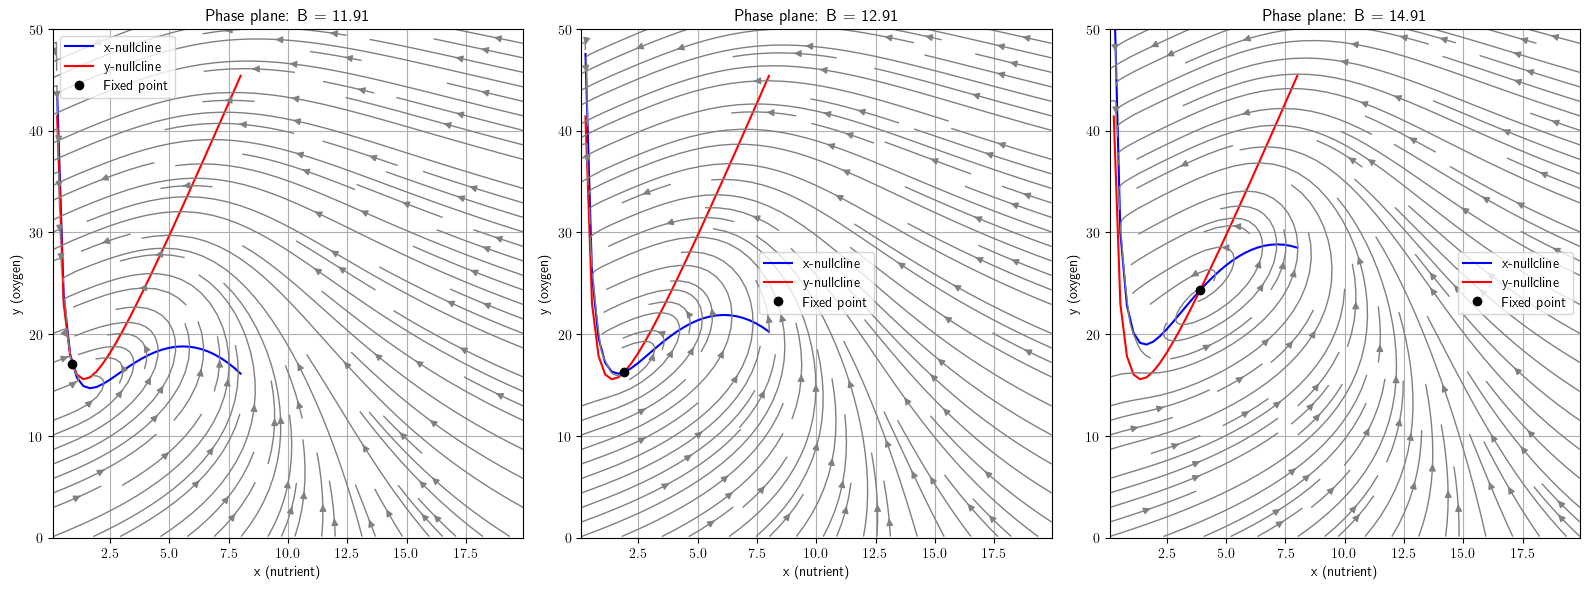

In [47]:
A = 11.0
q = 0.5
B_hopf = sp.optimize.fsolve(lambda B: tau(B, A, q), A + 1.0)[0]
print(f"Approximate Hopf bifurcation at B = {B_hopf:.2f}")

B_values = [B_hopf - 1.0, B_hopf, B_hopf + 2.0]  # below, near, above Hopf
x_vals_grid = np.linspace(0.1, max(B_values)+5, 50)
y_vals_grid = np.linspace(0.1, 50, 50)  # same y-limits as before
X, Y = np.meshgrid(x_vals_grid, y_vals_grid)

plt.figure(figsize=(16,6))
for i, B in enumerate(B_values):
    param = [A, B, q]
    x_star = B - A
    y_star = A * (1 + q*x_star**2)/x_star

    plt.subplot(1, len(B_values), i+1)
    
    # --- Nullclines ---
    y_xnull = (B - x_vals)*(1 + q*x_vals**2)/x_vals
    y_ynull = A*(1 + q*x_vals**2)/x_vals
    plt.plot(x_vals, y_xnull, 'b', label='x-nullcline')
    plt.plot(x_vals, y_ynull, 'r', label='y-nullcline')
    
    # --- Streamplot vector field ---
    U = B - X - (X*Y)/(1 + q*X**2)
    V = A - (X*Y)/(1 + q*X**2)
    speed = np.sqrt(U**2 + V**2)
    plt.streamplot(X, Y, U, V, color='gray', density=1.2, linewidth=1, arrowsize=1)

    # --- Fixed point ---
    plt.plot(x_star, y_star, 'ko', label='Fixed point')

    plt.xlabel('x (nutrient)')
    plt.ylabel('y (oxygen)')
    plt.title(f'Phase plane: B = {B:.2f}')
    plt.grid(True)
    plt.legend()
    plt.ylim(0,50)

plt.tight_layout()
plt.show()


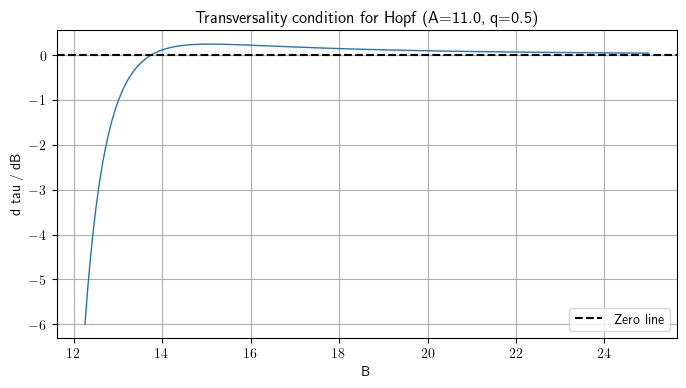

In [6]:
A = 11.0
q = 0.5
B_vals = np.linspace(A+1.25, 25, 500)  # B > A to ensure positive equilibrium
d_tau = dtau_dB(A, B_vals, q)

plt.figure(figsize=(8,4))
plt.plot(B_vals, d_tau, lw=1)
plt.axhline(0, color='k', linestyle='--', label='Zero line')
plt.xlabel('B')
plt.ylabel('d tau / dB')
plt.title(f'Transversality condition for Hopf (A={A}, q={q})')
plt.grid(True)
plt.legend()
plt.show()

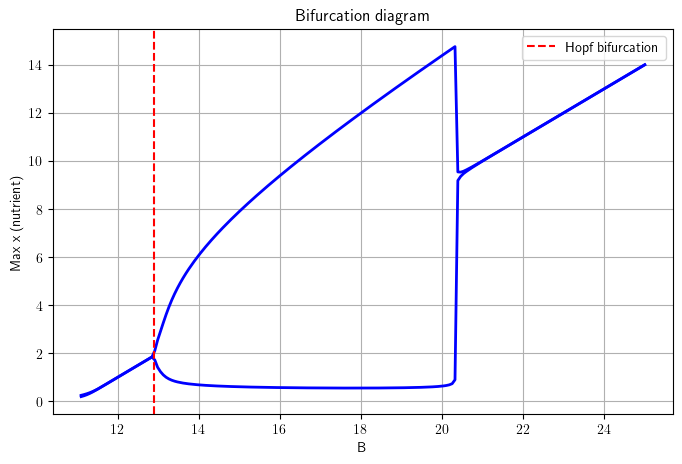

In [7]:
A = 11.0
q = 0.5
B_hopf = sp.optimize.fsolve(lambda B: tau(B, A, q), A + 1.0)[0]
B_scan = np.linspace(A+0.1, 25, 200)
x_max_list = []
x_min_list = []

for B in B_scan:
    param = [A, B, q]
    t, traj = RK4(bacterial_system, [0, 200], param, 0.01, [5,5])
    x = traj[:,0]
    # Take last 50% to avoid transients
    x_max_list.append(np.max(x[len(x)//2:]))
    x_min_list.append(np.min(x[len(x)//2:]))

plt.figure(figsize=(8,5))
plt.plot(B_scan, x_max_list, 'b', lw=2)
plt.plot(B_scan, x_min_list, 'b', lw=2)
plt.axvline(B_hopf, color='r', linestyle='--', label='Hopf bifurcation')
plt.xlabel('B')
plt.ylabel('Max x (nutrient)')
plt.title('Bifurcation diagram')
plt.grid(True)
plt.legend()
plt.show()

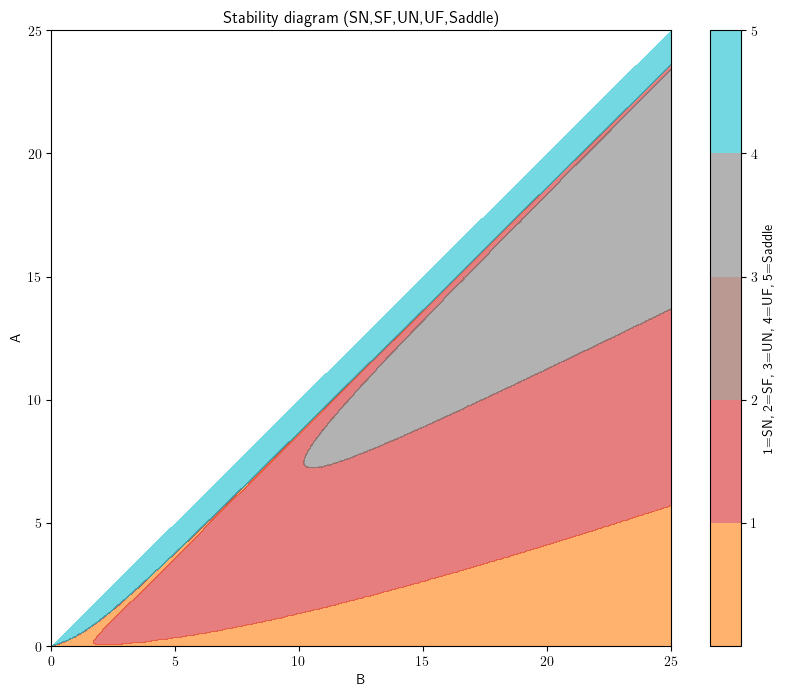

In [8]:
q = 0.5
A_vals = np.linspace(0., 25, 900)
B_vals = np.linspace(0., 25, 900)

# Create meshgrid
A_grid, B_grid = np.meshgrid(A_vals, B_vals)
tau_grid   = np.zeros_like(A_grid)
delta_grid = np.zeros_like(A_grid)
discrim    = np.zeros_like(A_grid)

# Classify regions
region = np.full(A_grid.shape, np.nan)  # SN=1, SF=2, UN=3, UF=4, Saddle=5

for i in range(len(A_vals)):
    for j in range(len(B_vals)):
        A = A_vals[i]
        B = B_vals[j]
        if B <= A:
            continue  # No interior equilibrium
        x_star = B - A
        D = 1 + q*x_star**2
        a = A*(1 - q*x_star**2)/(x_star*D)
        b = x_star/D
        tau = - (1 + a + b)
        delta = b*(1 - 2*a)
        disc = tau**2 - 4*delta
        
        # store values
        tau_grid[j,i] = tau
        delta_grid[j,i] = delta
        discrim[j,i] = disc
        
        # classify
        if delta < 0:
            region[j,i] = 5  # Saddle
        elif tau < 0:
            region[j,i] = 1 if disc > 0 else 2  # SN or SF
        elif tau > 0:
            region[j,i] = 3 if disc > 0 else 4  # UN or UF

plt.figure(figsize=(10,8))
cmap = plt.cm.get_cmap('tab10', 5)
plt.contourf(B_grid, A_grid, region, levels=[0,1,2,3,4,5],cmap = plt.colormaps['tab10'], alpha=0.6) 
plt.ylabel('A')
plt.xlabel('B')
plt.title('Stability diagram (SN,SF,UN,UF,Saddle)')
plt.colorbar(ticks=[1,2,3,4,5], label='1=SN, 2=SF, 3=UN, 4=UF, 5=Saddle')
plt.show()